In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load the dataset into a pandas dataframe. Name the variable as “survey”.

In [2]:
survey = pd.read_excel(r"C:\Users\HP\Downloads\Sample_Survey.xlsx")
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [3]:
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

# 2. How many samples were collected on each day?

In [4]:
survey.groupby(["collection_date"])["collection_date"].count()

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-26     598
2020-08-27     665
2020-08-28     761
2020-08-29     620
2020-08-30     582
2020-08-31     557
2020-09-01     607
Name: collection_date, dtype: int64

# 3. What proportion of the total respondents were aged less than 45?

In [5]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [6]:
survey[survey["age"]=='24ko']

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
123,124,2020-08-24,Rural,Post - Graduation,"BPL/Below ₹ 5,000",JD(U),Others,Fully Satisfied,Somewhat Dissatisfied,24ko,Male,180,Gen,2.092567


In [7]:
survey = survey.drop(index=123) 

In [8]:
survey["age"].astype(int)

0       26
1       34
2       25
3       36
4       22
        ..
6862    25
6863    30
6864    20
6865    23
6866    33
Name: age, Length: 6866, dtype: int32

In [9]:
age45 = survey[survey["age"]<45] 

In [10]:
 len(survey[survey['age'] < 45]) / len(survey)*100

93.18380425284009

age_less_45 =[age45.count()/survey["age"].count()]*100
age_less_45

# 4. Create a new column in the dataframe “age_group”. This column should contain the age
group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The
dataframe should look like this after the column creation:
response_id age age_group
1 26 25-40
2 34 25-40
3 25 25-40
4 66 55+


In [11]:
def age_group(age):
    if age >= 18 and age <= 25:
        return '18-25'
    elif age > 25 and age <= 40:
        return '25-40'
    elif age > 40 and age <= 55:
        return '40-55 ' 
    else:
        return '55+'


In [12]:
survey['age_group']=survey['age'].apply(age_group)

In [13]:
survey.tail()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,18-25
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,25-40
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926,18-25
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137,18-25
6866,6867,2020-09-01,Rural,10th Pass,"₹ 5,000 - ₹ 10,000",JAP(L),JAP(L),Fully Satisfied,Fully Satisfied,33,Male,241,Gen,1.797518,25-40


# 5. How many samples were collected for each age-group? Which age-group had the most samples?


In [14]:
survey["age_group"].value_counts()

25-40     3423
18-25     2691
40-55      644
55+        108
Name: age_group, dtype: int64

# 6. What proportion of the respondents had opted for the RJD party in both the Vote_Nowand the Past_Vote questions?

In [15]:
x6=len(survey[(survey['Vote_Now']=='RJD') & (survey['Past_Vote']=='RJD')])/len(survey)

In [16]:
x6*100


11.81182639091174

# 7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.

In [17]:
y = survey.groupby(["collection_date"])["collection_date"].count()

In [18]:
x = survey[survey['CM_satisfaction'] == "Fully Satisfied"]

In [19]:
x1 = x.groupby(["collection_date"])["collection_date"].count()

In [20]:
cm_satisfied_proportion = (x1/y)*100

In [21]:
cm_satisfied_proportion

collection_date
2020-08-24     9.810555
2020-08-25     9.519038
2020-08-26     9.866221
2020-08-27     8.120301
2020-08-28    12.089356
2020-08-29    11.774194
2020-08-30    11.168385
2020-08-31    11.131059
2020-09-01    12.355848
Name: collection_date, dtype: float64

# 8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [22]:
y = survey.groupby(["collection_date"])["collection_date"].count()

In [23]:
z = survey[survey['MLA_satisfaction'] == "Fully Dissatisfied"]
z1 = z.groupby(["collection_date"])["collection_date"].count()

In [24]:
z

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
5,6,2020-08-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603,25-40
6,7,2020-08-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283,25-40
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,6856,2020-09-01,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",NOTA,JD(U),Fully Dissatisfied,Fully Dissatisfied,30,Male,241,EBC,0.174156,25-40
6857,6858,2020-09-01,Rural,12th Pass,"BPL/Below ₹ 5,000",RJJP,BJP,Fully Dissatisfied,Fully Dissatisfied,22,Male,168,Gen,0.085758,18-25
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329,18-25
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780,25-40


In [25]:
MLA_Diss_satisfied_proportion=(z1/y)*100
MLA_Diss_satisfied_proportion

collection_date
2020-08-24    60.013532
2020-08-25    63.126253
2020-08-26    59.030100
2020-08-27    60.601504
2020-08-28    60.709593
2020-08-29    56.451613
2020-08-30    62.027491
2020-08-31    57.630162
2020-09-01    63.426689
Name: collection_date, dtype: float64

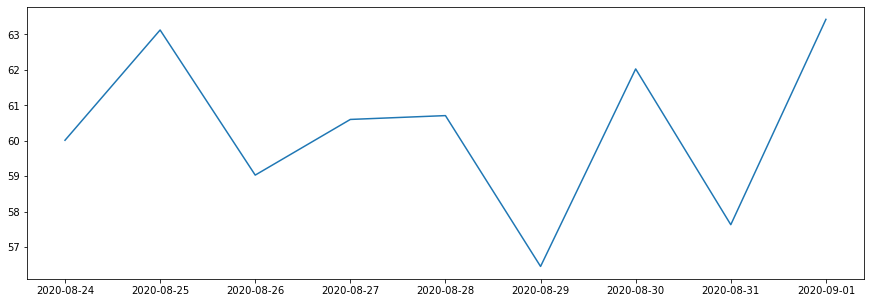

In [26]:
plt.figure(figsize=(15, 5))

plt.plot(MLA_Diss_satisfied_proportion )

# 9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [27]:
pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='count',values='response_id')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


# 10. Repeat the above question with the cell values as the sum of “weight”.

In [28]:
pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='sum',values='weight')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


# 11. Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.

In [29]:
x11 = pd.DataFrame(survey.groupby(["age_group"])["response_id"].count())
x11

,response_id
age_group,
18-25,2691
25-40,3423
40-55,644
55+,108


# 12. Create a dataframe by performing a group by over age_group and finding the count oftotal samples for each age_group that opted for the JD(U) party in Vote_Now.

In [30]:
x12=pd.DataFrame(survey.groupby(by='age_group')[['Vote_Now']].apply(lambda x:np.sum(x=='JD(U)')))
x12

,Vote_Now
age_group,
18-25,215
25-40,245
40-55,55
55+,10


# 13. Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.

In [31]:
df13=pd.merge(x11,x12,on='age_group')
df13

,response_id,Vote_Now
age_group,,
18-25,2691,215
25-40,3423,245
40-55,644,55
55+,108,10
